<a href="https://colab.research.google.com/github/S-loaiza-UAO/Machine-learning-UAO/blob/main/Modulo_2_Ingenieria_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

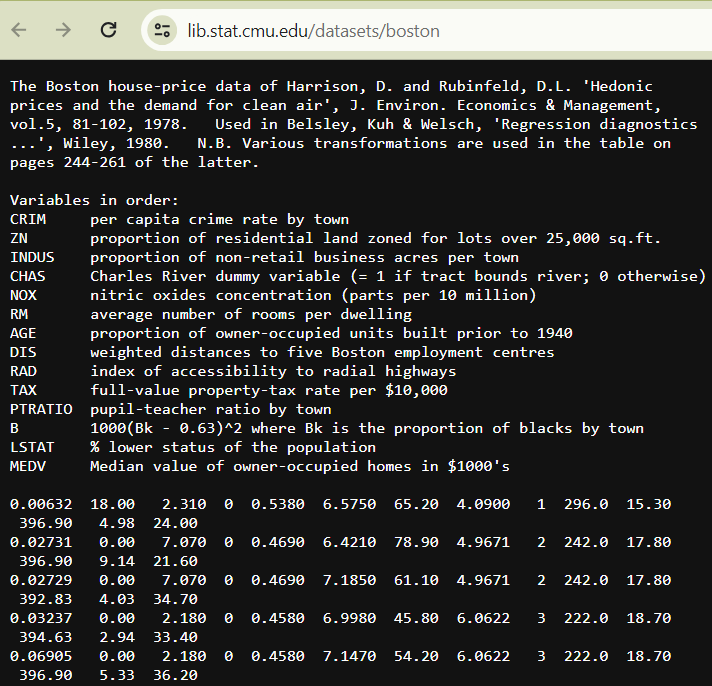

# Visualización de la información

In [60]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score

# URL del conjunto de datos
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Leer el conjunto de datos desde la URL
# Omitimos 22 filas ya que estas contienen texto que es explicativo con informacion del DataSet
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Crear las matrices de características y objetivo
# Debido a que el DataSet esta conformado de una forma particular, es necesario hacer un arreglo de la informacion para poderla utilizar los datos.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Configurar opciones de impresión para evitar notación científica
np.set_printoptions(suppress=True)

# Informacion para saber que matriz de datos se adquirio con el DataFrame
print('Tamaño de la matriz de datos:', data.shape)
# Que tipos de datos son?
#Tipos de atibutos para los datos analizados
print('Tipo de datos obtenidos:', data.dtype)


Tamaño de la matriz de datos: (506, 13)
Tipo de datos obtenidos: float64


In [61]:
# Cargar el conjunto de datos original
X, y = data, target

# Imprimir algunas filas del conjunto de datos y el objetivo para verificar que la composicion original de los datos sea la adecuada.
print("Primeras 5 filas del conjunto de datos original:")
print(X[:5])
print("\nPrimeros 5 valores objetivo de la matriz original:")
print(y[:5])

Primeras 5 filas del conjunto de datos original:
[[  0.00632  18.        2.31      0.        0.538     6.575    65.2
    4.09      1.      296.       15.3     396.9       4.98   ]
 [  0.02731   0.        7.07      0.        0.469     6.421    78.9
    4.9671    2.      242.       17.8     396.9       9.14   ]
 [  0.02729   0.        7.07      0.        0.469     7.185    61.1
    4.9671    2.      242.       17.8     392.83      4.03   ]
 [  0.03237   0.        2.18      0.        0.458     6.998    45.8
    6.0622    3.      222.       18.7     394.63      2.94   ]
 [  0.06905   0.        2.18      0.        0.458     7.147    54.2
    6.0622    3.      222.       18.7     396.9       5.33   ]]

Primeros 5 valores objetivo de la matriz original:
[24.  21.6 34.7 33.4 36.2]


In [62]:
print("NaN en X:", np.isnan(X).any())
print("NaN en y:", np.isnan(y).any())

NaN en X: False
NaN en y: False


# 1. Aplicación y entrenamiento del modelo: LinearRegression

*   Score_original= 68.44267283527074 %



In [63]:
# Dividir el conjunto de datos en entrenamiento con el 75% y prueba con el 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenar el modelo de regresión lineal estándar con características originales
model = LinearRegression()
model.fit(X_train, y_train)

# Entrenar el modelo de regresión lineal estándar con características originales
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_original = mean_squared_error(y_test, y_pred)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluar el rendimiento del modelo en conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el puntaje (score) R^2 en el conjunto de prueba
score_original = r2_score(y_test, y_pred)

# Imprimir el puntaje del modelo
#print("Mean Squared Error (MSE) de la matriz original:",mse_original)
print("Puntaje R^2 en el conjunto de prueba:", score_original*100,"%")

Puntaje R^2 en el conjunto de prueba: 68.44267283527074 %


# 2. Escalado de características comparadas con LinearRegression


*   Score_StandarScale = 68.44267283527132 %
*   Score_MinMaxScale = 68.44267283527128 %
*   Score_RobustScale = 68.44267283527128 %



**Aplicacion del StandardScaler**
score_SS = 68.44267283527132 %

In [64]:
# Crear un objeto StandardScaler y ajustarlo a los datos de entrenamiento (X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler)

# Imprimir la media de cada característica en el conjunto de entrenamiento
print("Media de cada característica en X_train:")
print(scaler.mean_)
print("\n")

# Imprimir la escala (desviación estándar) de cada característica en el conjunto de entrenamiento
print("Escala (desviación estándar) de cada característica en X_train:")
print(scaler.scale_)
print("\n")
# Transformar los datos de entrenamiento (X_train) y prueba (X_test) usando el scaler ajustado
X_train_scaled_SS = scaler.transform(X_train)
X_test_scaled_SS = scaler.transform(X_test)

# Imprimir los datos de entrenamiento escalados
print("Datos de entrenamiento escalados:")
print(X_train_scaled_SS)
print("Datos de prueba escalados:")
print(X_test_scaled_SS)

StandardScaler()
Media de cada característica en X_train:
[  3.46865475  11.59630607  11.11997361   0.07651715   0.55832639
   6.32349604  69.14722955   3.76343984   9.36147757 405.31134565
  18.26385224 358.76712401  12.51329815]


Escala (desviación estándar) de cada característica en X_train:
[  8.30300721  23.06290782   6.9442214    0.26582377   0.11896058
   0.71913548  27.66657703   2.10984408   8.58996739 165.84124129
   2.26096553  87.39633989   7.138254  ]


Datos de entrenamiento escalados:
[[-0.40679535 -0.50281197 -1.24707626 ... -0.20515671  0.40451209
  -1.07775629]
 [ 0.00799171 -0.50281197  1.21828293 ... -1.57625236 -3.09803734
   0.35116456]
 [-0.41344957  0.36438137 -1.12179223 ... -1.48779457  0.32659121
  -1.22625199]
 ...
 [-0.41595107  2.96596138 -1.31187834 ... -0.55898784  0.36812613
  -0.91385066]
 [ 0.92638065 -0.50281197  1.00515608 ...  0.8563367  -2.84814129
   1.50690937]
 [-0.39020739 -0.50281197 -0.36864804 ...  1.16593894 -3.29495634
  -0.26383177]]
Da

In [65]:
X_train_scaled_SS.mean(axis=0)

array([-0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.])

In [66]:
X_train_scaled_SS.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
# Crear un pipeline que incluye un escalador (StandardScaler) y un modelo de regresión lineal
pipe = make_pipeline(StandardScaler(), LinearRegression())

# Ajustar el pipeline al conjunto de entrenamiento (aplicará la escala a los datos de entrenamiento)
pipe.fit(X_train_scaled_SS, y_train)

# Calcular el puntaje (score) del modelo en el conjunto de prueba
# El pipeline aplica la escala automáticamente al conjunto de prueba sin filtrar información de entrenamiento
score_SS = pipe.score(X_test_scaled_SS, y_test)

# Imprimir el puntaje del modelo
print("Puntaje del modelo en el conjunto de prueba:", score_SS*100, "%")

Puntaje del modelo en el conjunto de prueba: 68.44267283527132 %


**Aplicacion del MinMaxScaler**
Score_MM = 68.44267283527128 %

In [68]:
# Crear un objeto MinMaxScaler y ajustarlo a los datos de entrenamiento (X_train)
scaler = MinMaxScaler()
scaler.fit(X_train)
# Transformar los datos de entrenamiento (X_train) usando el scaler ajustado
X_train_scaled_MM = scaler.transform(X_train)
X_test_scaled_MM = scaler.transform(X_test)
print("Matriz a transformar:",X_train_scaled_MM.shape)
print("Matriz de minimos antes de transformar:",(X_train.min(axis=0)))
print("Matriz de maximos antes de transformar:",(X_train.max(axis=0)))
print("Matriz de minimos despues de transformar:",(X_train_scaled_MM.min(axis=0)))
print("Matriz de maximos despues de transformar:",(X_train_scaled_MM.max(axis=0)))
print("\n")
print("Matriz a transformar:",X_test_scaled_MM.shape)
print("Matriz de minimos despues de transformar:",(X_test_scaled_MM.min(axis=0)))
print("Matriz de maximos despues de transformar:",(X_test_scaled_MM.max(axis=0)))

Matriz a transformar: (379, 13)
Matriz de minimos antes de transformar: [  0.00906   0.        1.21      0.        0.385     3.863     2.9
   1.1296    1.      187.       12.6       0.32      1.73   ]
Matriz de maximos antes de transformar: [ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      22.     396.9     37.97  ]
Matriz de minimos despues de transformar: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Matriz de maximos despues de transformar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Matriz a transformar: (127, 13)
Matriz de minimos despues de transformar: [-0.0000308   0.         -0.02826988  0.          0.01440329 -0.06141956
  0.03398558  0.00359192  0.          0.0019084   0.04255319  0.00554743
  0.03173289]
Matriz de maximos despues de transformar: [0.82642917 0.95       1.         1.         1.         0.84828147
 1.         0.87121825 1.         1.         1.         1.
 0.97268212]


In [69]:
X_train_scaled_MM.mean(axis=0)

array([0.03888621, 0.11596306, 0.37353839, 0.07651715, 0.35663865,
       0.50040595, 0.68225777, 0.23950748, 0.3635425 , 0.41662471,
       0.60253747, 0.90384569, 0.29755238])

In [70]:
X_train_scaled_MM.std(axis=0)

array([0.09332667, 0.23062908, 0.26174977, 0.26582377, 0.24477487,
       0.14625493, 0.2849287 , 0.19185808, 0.37347684, 0.31649092,
       0.24052825, 0.22037506, 0.19697169])

In [71]:
# Crear un pipeline que incluye un escalador (StandardScaler) y un modelo de regresión lineal
pipe = make_pipeline(MinMaxScaler(), LinearRegression())

# Ajustar el pipeline al conjunto de entrenamiento (aplicará la escala a los datos de entrenamiento)
pipe.fit(X_train_scaled_MM, y_train)

# Calcular el puntaje (score) del modelo en el conjunto de prueba
# El pipeline aplica la escala automáticamente al conjunto de prueba sin filtrar información de entrenamiento
score_MM = pipe.score(X_test_scaled_MM, y_test)

# Imprimir el puntaje del modelo
print("Puntaje del modelo en el conjunto de prueba:", score_MM*100,"%")

Puntaje del modelo en el conjunto de prueba: 68.44267283527128 %


**Aplicacion de RobustScaler**
Score_RS = 68.44267283527128 %

In [72]:
#Crear un objeto MinMaxScaler y ajustarlo a los datos de entrenamiento (X_train)
scaler = RobustScaler()
scaler.fit(X_train)
# Transformar los datos de entrenamiento (X_train) usando el scaler ajustado
X_train_scaled_RS = scaler.transform(X_train)
X_test_scaled_RS = scaler.transform(X_test)


In [73]:
# Crear un pipeline que incluye un escalador (StandardScaler) y un modelo de regresión lineal
pipe = make_pipeline(RobustScaler(), LinearRegression())

# Ajustar el pipeline al conjunto de entrenamiento (aplicará la escala a los datos de entrenamiento)
pipe.fit(X_train_scaled_RS, y_train)

# Calcular el puntaje (score) del modelo en el conjunto de prueba
# El pipeline aplica la escala automáticamente al conjunto de prueba sin filtrar información de entrenamiento
score_RS = pipe.score(X_test_scaled_RS, y_test)

# Imprimir el puntaje del modelo
print("Puntaje del modelo en el conjunto de prueba:", score_RS*100,"%")

Puntaje del modelo en el conjunto de prueba: 68.44267283527128 %


# 3. Implementación del PCA

*   PCA + StandarScaler = 38.24496425074213 %
*   PCA + MinMaxScaler  = 30.84250903438519 %

**PCA n=2 sobre StandarScaler**

In [74]:
from sklearn.decomposition import PCA
scaler= StandardScaler()
scaler.fit(X)
X_scaled_SS_PCA= scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled_SS_PCA)

# Transformacion de los datos al PCA n=2
X_pca_SS = pca.transform(X_scaled_SS_PCA)
print("Tamaño de matriz original: {}".format(str(X_scaled_SS_PCA.shape)))
print("Tamaño de matriz reducida: {}".format(str(X_pca_SS.shape)))

Tamaño de matriz original: (506, 13)
Tamaño de matriz reducida: (506, 2)


In [75]:
# Importar las bibliotecas necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca_SS, y, test_size=0.25, random_state=42)

# Crear un modelo de regresión lineal con PCA
model_pca = LinearRegression()

# Ajustar el modelo al conjunto de entrenamiento
model_pca.fit(X_train, y_train)

# Calcular el puntaje (score) del modelo en el conjunto de prueba
score_pca_ss = model_pca.score(X_test, y_test)

# Imprimir el puntaje del modelo con PCA
print("Puntaje del modelo con PCA y StandarScaler:", score_pca_ss*100,"%")


Puntaje del modelo con PCA y StandarScaler: 38.244964784121315 %


**PCA n=2 sobre MinMaxScaler**

In [76]:
from sklearn.decomposition import PCA
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled_MM_PCA= scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled_MM_PCA)

# Transformacion de los datos al PCA n=2
X_pca_MM = pca.transform(X_scaled_MM_PCA)
print("Tamaño de matriz original: {}".format(str(X_scaled_MM_PCA.shape)))
print("Tamaño de matriz reducida: {}".format(str(X_pca_MM.shape)))

Tamaño de matriz original: (506, 13)
Tamaño de matriz reducida: (506, 2)


In [77]:
# Importar las bibliotecas necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca_MM, y, test_size=0.25, random_state=42)

# Crear un modelo de regresión lineal con PCA
model_pca = LinearRegression()

# Ajustar el modelo al conjunto de entrenamiento
model_pca.fit(X_train, y_train)

# Calcular el puntaje (score) del modelo en el conjunto de prueba
score_pca_MM = model_pca.score(X_test, y_test)

# Imprimir el puntaje del modelo con PCA
print("Puntaje del modelo con PCA y StandarScaler:", score_pca_MM*100,"%")


Puntaje del modelo con PCA y StandarScaler: 30.842509065926027 %


# 4. Aplicación de BINING a la función objetivo

*   Score después de aplicar binning = 16.07114822670218 %



In [78]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Aplicar binning a la variable objetivo ('target')
num_bins = 15  # Número de bins
bin_labels = [f'B_{i+1}' for i in range(num_bins)]  # Etiquetas para los bins

# Utilizar la función cut de pandas para crear bins y asignar las etiquetas
y_train_binned = pd.cut(y_train, bins=num_bins, labels=bin_labels)
y_test_binned = pd.cut(y_test, bins=num_bins, labels=bin_labels)

# Imprimir la distribución de los bins en el conjunto de entrenamiento
print("Distribución de bins en el conjunto de entrenamiento:")
print(y_train_binned.value_counts())

# Imprimir la distribución de los bins en el conjunto de prueba
print("\nDistribución de bins en el conjunto de prueba:")
print(y_test_binned.value_counts())


Distribución de bins en el conjunto de entrenamiento:
B_1      8
B_2     16
B_3     31
B_4     41
B_5     58
B_6     79
B_7     47
B_8     23
B_9     20
B_10    17
B_11    12
B_12     1
B_13     7
B_14     4
B_15    15
dtype: int64

Distribución de bins en el conjunto de prueba:
B_1      3
B_2      8
B_3     11
B_4      9
B_5     30
B_6     22
B_7     22
B_8      6
B_9      5
B_10     2
B_11     3
B_12     1
B_13     1
B_14     0
B_15     4
dtype: int64


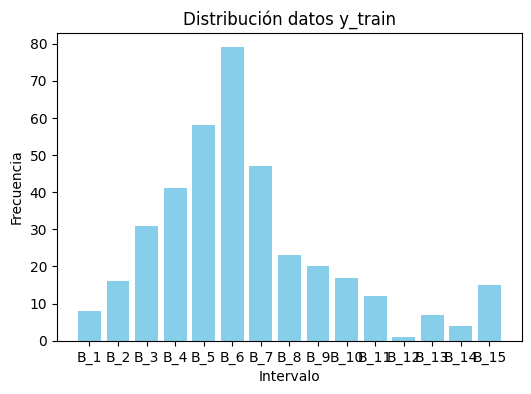

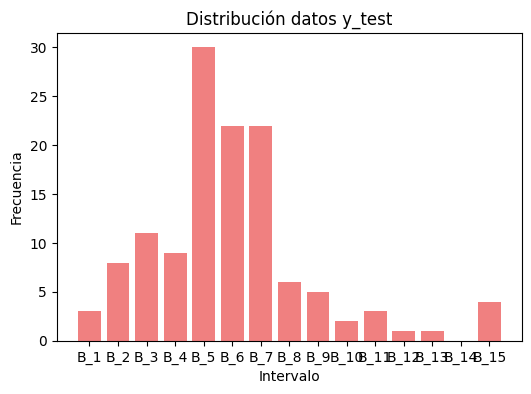

In [79]:
# Graficar la distribución de bins en el conjunto de entrenamiento
plt.figure(figsize=(6, 4))
plt.bar(y_train_binned.value_counts().index, y_train_binned.value_counts(), color='skyblue')
plt.title('Distribución datos y_train')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.show()

# Graficar la distribución de bins en el conjunto de prueba
plt.figure(figsize=(6, 4))
plt.bar(y_test_binned.value_counts().index, y_test_binned.value_counts(), color='lightcoral')
plt.title('Distribución datos y_test')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.show()


In [80]:
from sklearn.preprocessing import LabelEncoder

# Crear un modelo de regresión lineal después de aplicar binning
model_after_binning = LinearRegression()

# Convertir las etiquetas de binning a valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
y_train_binned_numeric = label_encoder.fit_transform(y_train_binned)
y_test_binned_numeric = label_encoder.transform(y_test_binned)

# Entrenar el modelo después de aplicar binning
model_after_binning.fit(X_train, y_train_binned_numeric)  # Utilizar y_train_binned después de aplicar binning

# Realizar predicciones en el conjunto de prueba después de aplicar binning
y_pred_after_binning = model_after_binning.predict(X_test)

# Calcular el score (R^2) después de aplicar binning
score_after_binning = r2_score(y_test_binned_numeric, y_pred_after_binning)  # Utilizar y_test_binned después de aplicar binning

# Imprimir el score después de aplicar binning
print("Score (R^2) después de aplicar binning:", score_after_binning*100,"%")

Score (R^2) después de aplicar binning: 16.07114822670218 %


# 5. Aplicación de función polinómica

*   Score_Ridge sin interaccion de la funcion poly = 69.1730016405085 %
*   Score_Ridge con interaccion de la funcion poly = 81.5971030422086 %
*   Score (R^2) Regresión Lineal = 68.44267283527075 %
*   Score (R^2) Regresión Polinómica (grado 2) = 55.32989972696223 %



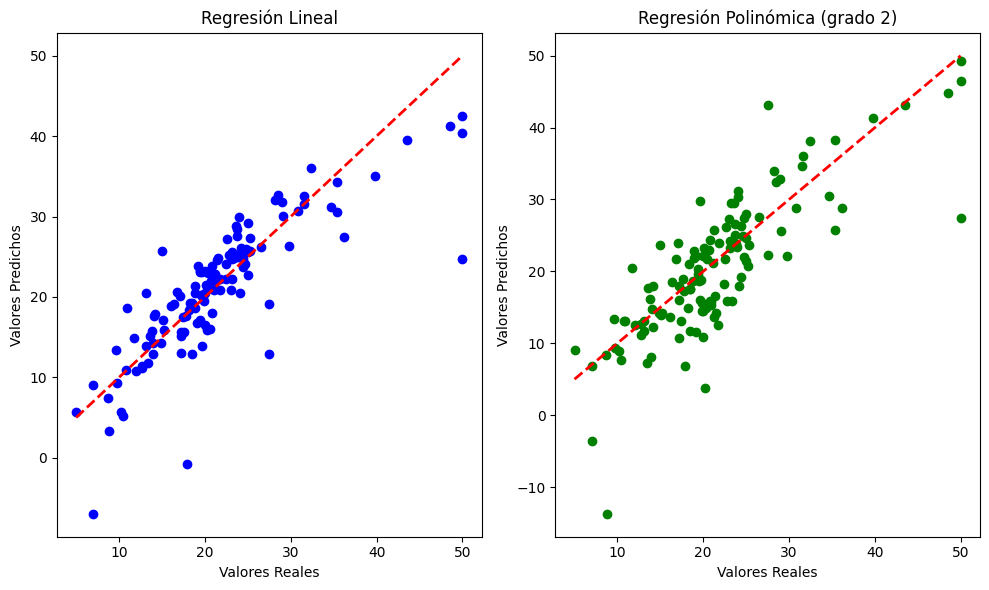

Score (R^2) Regresión Lineal: 0.6844267283527075
Score (R^2) Regresión Polinómica (grado 2): 0.5532989972696223


In [88]:
# Dividir el conjunto de datos en entrenamiento con el 75% y prueba con el 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelo de regresión lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
score_linear = r2_score(y_test, y_pred_linear)

# Modelo de regresión polinómica (grado 2)
degree = 2
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
score_poly = r2_score(y_test, y_pred_poly)

# Visualización de resultados
plt.figure(figsize=(10, 6))

# Modelo de regresión lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Modelo de regresión polinómica
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title(f'Regresión Polinómica (grado {degree})')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

plt.tight_layout()
plt.show()

# Comparación de scores
print("Score (R^2) Regresión Lineal:", score_linear)
print(f"Score (R^2) Regresión Polinómica (grado {degree}):", score_poly)


In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2).fit(X_train_scaled_MM)
X_train_poly= poly.transform(X_train_scaled_MM)
X_test_poly= poly.transform(X_test_scaled_MM)

print("Tamaño X_train:{}".format(X_train_scaled_MM.shape))
print("Tamaño X_train_poly:{}".format(X_train_poly.shape))

Tamaño X_train:(379, 13)
Tamaño X_train_poly:(379, 105)


In [90]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled_MM, y_train)
print("Score sin interaccion de la funcion: {:.15f}".format(ridge.score(X_test_scaled_MM, y_test)))

ridge = Ridge().fit(X_train_poly , y_train)
print("Score con interaccion de la funcion: {:.15f}".format(ridge.score(X_test_poly, y_test)))


Score sin interaccion de la funcion: 0.691730016405085
Score con interaccion de la funcion: 0.815971030422086


# Conclusión:
**¿Qué estrategia de ingeniería de características ofrece los mejores resultados y por qué?**
*   Despues de realizar las diferentes evaluaciones de los metodos implementados, el modelo que presento una mejoria en la respuesta y su Score fue el mas alto, fue la aplicacion polinomica de grado ^2 con un escalado bajo el modelo MinMaxScaler, obteniendo un porcentaje del 81%, sobre el 68% que es el promedio de respuesta de los otros modelos, partiendo de el modelo de regresion lineal entrenado inicialmente.
*   El modelo polinomial se evaluo hasta grado ^2 debido a que no fue posible realizar una maproximacion a un grado superior por terminos de disponibilidad de maquina (memoria RAM y tiempo de ejecucion en el entorno COLAB).

*   Queda incertidumbre de si la forma en la que fueron adquiridos los datos si benefician la manera en como se ejecutan los diferentes modelos, adquirir la informacion mediante una matriz numpy no permite generar algunas visualizaciones para interpretar la informacion ya que no se pueden separar datos por caracteristicas particulares.
*   El modelo que menor desempeño presento fue la aplicacion de BINNING sobre la funcion objetivo, esto se debe a la discretizacion de los datos que permite la perdida de informacion dependiendo de la cantidad de intervalos generados. esto beneficia un computacion mas rapida pero sacrifica la capacidad del modelo para predecir los valor.




